In [1]:
import requests 
from bs4 import BeautifulSoup 
import re


In [2]:
def start_requests(url):
    r = requests.get(url)
    return r.content

In [3]:
movie_Dict = {'Movies Name':[],'Release Year':[], 'Restricted Level':[], 'Genre':[], 'Score':[], 'Director':[], 'Votes':[]}

In [4]:
def parse(text):
    soup = BeautifulSoup(text, 'html.parser')
    movie_list = soup.find_all('div', class_ = 'lister-item-content') # 'div class' list all info. of each movie
    for movie in movie_list:
        movies_Name = movie.find_all('a')[0].text
        movies_Year = movie.find_all('span')[1].text
        try:
            movies_R_Level = movie.find_all('span', class_ = 'certificate')[0].text.strip()
        except:
            movies_R_Level = 'None'
        movies_ReleaseYear = re.findall(r'\d{4}', movies_Year)[0]
        movies_Genre = movie.find_all('span', class_ = 'genre')[0].text.strip().replace(',','')
        try:
            movies_Score = float(movie.find_all('div', class_ = 'inline-block ratings-imdb-rating')[0]['data-value'])
        except:
            movies_Score = 'None'
        movies_Director = movie.find_all('p')[2].find_all('a')[0].text
        try: 
            movies_Votes = movie.find_all('p')[3].find_all('span')[1]['data-value']
        except:
            movies_Votes = 'None'
        
        movie_Dict['Movies Name'].append(movies_Name)
        movie_Dict['Release Year'].append(movies_ReleaseYear)
        movie_Dict['Restricted Level'].append(movies_R_Level)
        movie_Dict['Genre'].append(movies_Genre)
        movie_Dict['Score'].append(movies_Score)
        movie_Dict['Director'].append(movies_Director)
        movie_Dict['Votes'].append(movies_Votes)
        
    return movie_Dict

def main():
    for i in range(2):
        x = 1 + (i * 50)
        url = f'https://www.imdb.com/search/title?title_type=feature&start={x}&ref_=adv_nxt'
        text = start_requests(url)
        parse(text)

if __name__ == '__main__':
    main()

print(movie_Dict)


{'Movies Name': ['Fantastic Beasts: The Crimes of Grindelwald', 'The Ballad of Buster Scruggs', 'Bohemian Rhapsody', 'Creed II', 'The Lion King', 'Ralph Breaks the Internet', 'Robin Hood', 'Widows', 'A Star Is Born', 'Aquaman', 'The Grinch', 'Outlaw King', 'Fantastic Beasts and Where to Find Them', 'The Christmas Chronicles', 'Overlord', 'Crazy Rich Asians', 'Venom', 'Instant Family', 'Incredibles 2', 'Peppermint', 'The Meg', 'Mission: Impossible - Fallout', 'The Princess Switch', 'The Favourite', 'Captain Marvel', 'Mile 22', 'Green Book', 'Deadpool 2', "The Girl in the Spider's Web", 'The Nun', 'First Man', 'Pokémon Detective Pikachu', 'Avengers: Infinity War', 'Cam', 'The Lego Movie 2: The Second Part', 'The Predator', 'The Greatest Showman', 'Toy Story 4', 'The Equalizer 2', 'Vice', 'Mortal Engines', 'BlacKkKlansman', 'The Happytime Murders', 'Suspiria', 'Halloween', 'The Nutcracker and the Four Realms', 'Mary Poppins Returns', 'Once Upon a Time in Hollywood', 'The Lion King', 'How 

In [5]:
import pandas as pd
Dataframe = pd.DataFrame(movie_Dict)
Dataframe[['Movies Name','Release Year','Restricted Level', 'Genre','Score','Director','Votes']].to_csv('movies.csv')

In [6]:
movies_table = pd.read_csv("movies.csv")
Dataframe = movies_table[['Movies Name','Release Year','Restricted Level', 'Genre','Score','Director','Votes']]
Dataframe.head(50)

,Movies Name,Release Year,Restricted Level,Genre,Score,Director,Votes
0,Fantastic Beasts: The Crimes of Grindelwald,2018,PG-13,Adventure Family Fantasy,7.0,David Yates,66343
1,The Ballad of Buster Scruggs,2018,R,Comedy Drama Musical,7.4,Ethan Coen,27556
2,Bohemian Rhapsody,2018,PG-13,Biography Drama Music,8.4,Bryan Singer,128408
3,Creed II,2018,PG-13,Drama Sport,8.0,Steven Caple Jr.,8568
4,The Lion King,2019,None,Animation Adventure Drama,None,Jon Favreau,None
5,Ralph Breaks the Internet,2018,PG,Animation Adventure Comedy,7.6,Phil Johnston,10019
6,Robin Hood,2018,PG-13,Action Adventure Thriller,5.3,Otto Bathurst,5713
7,Widows,2018,R,Crime Drama Thriller,7.5,Steve McQueen,14340
8,A Star Is Born,2018,R,Drama Music Romance,8.2,Bradley Cooper,105533
9,Aquaman,2018,PG-13,Action Adventure Fantasy,None,James Wan,None


In [7]:
!pip install pyecharts

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
from pyecharts import Page, Pie, Bar  

In [13]:
types = movie_Dict['Genre']
#print(types)
type_count = {}
for x in types:  
    type_list = x.strip().split()
    for y in type_list:
        if y not in type_count:
            type_count[y] = 1
        else:
            type_count[y] += 1
import matplotlib.pyplot as plt
pie_graph = Pie('Percentage of Movie Type',title_pos= 'center', width = 900  )
pie_graph.add('', list(type_count.keys()),list(type_count.values()), is_label_show=True, is_legend_show = True,
              legend_orient='vertical', legend_pos='right')
pie_graph.render() #this command gives a html file called pie.html in our project folder. 

In [14]:
pie_graph 

In [15]:
from pyecharts import Bar 
bar_graph = Bar('Movie Type Frequency',title_pos= 'center')
bar_graph.add('', list(type_count.keys()),list(type_count.values()), mark_point = ["max", "min"])
bar_graph.render()   #this command gives a html file called bar.html in our project folder. 

In [17]:
bar_graph

In [19]:
unique_genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War']

In [20]:
genre_count = []
for genre in unique_genres:
    count = Dataframe['Genre'].str.contains(genre)
    genre_count.append([genre,len(Dataframe[count])])
genreCountDF = pd.DataFrame(genre_count, columns = ['Genre','Count'])
genreSorted = genreCountDF.sort_values(by=['Count'], ascending=False)
top5genre = genreSorted[:5]
genreSorted

,Genre,Count
1,Adventure,43
6,Drama,39
0,Action,38
4,Comedy,25
8,Fantasy,16
5,Crime,15
17,Thriller,15
3,Biography,13
7,Family,13
2,Animation,12


In [22]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

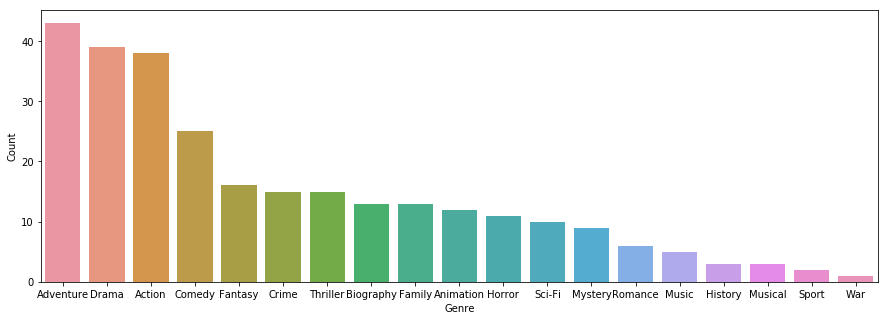

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = 'Genre', y = 'Count', data = genreSorted[:19])